# NCRN Breeding Bird Data Analysis 

In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import project_functions

### The data I'm using is 10 years of breeding bird data from the National Park Service. The study area is Prince Williams Forest Park in Washington, DC. Here's what the raw data looks like: 

In [3]:
pd.read_csv('/Users/evanlewis/data301/Project/project-group53-project/data/raw/PRWI_Data.csv')

,Admin_Unit_Code,Sub_Unit_Code,Site_Name,Plot_Name,Location_Type,Year,Date,Start_Time,End_Time,Observer,...,NPSTaxonCode,AOU_Code,PIF_Watchlist_Status,Regional_Stewardship_Status,Temperature,Humidity,Sky,Wind,Disturbance,Initial_Three_Min_Cnt
0,PRWI,NaN,PRWI 2,PRWI-0097,Forest,2007,2007-05-29,6:27,6:46,Desiree Narango,...,85846.0,EAWP,False,True,18.5,85.0,Partly Cloudy,Calm (< 1 mph) smoke rises vertically,Slight effect on count,False
1,PRWI,NaN,PRWI 2,PRWI-0097,Forest,2007,2007-05-29,6:27,6:46,Desiree Narango,...,93587.0,REVI,False,False,18.5,85.0,Partly Cloudy,Calm (< 1 mph) smoke rises vertically,Slight effect on count,False
2,PRWI,NaN,PRWI 2,PRWI-0097,Forest,2007,2007-05-29,6:27,6:46,Desiree Narango,...,95300.0,AMGO,False,False,18.5,85.0,Partly Cloudy,Calm (< 1 mph) smoke rises vertically,Slight effect on count,False
3,PRWI,NaN,PRWI 2,PRWI-0097,Forest,2007,2007-05-29,6:27,6:46,Desiree Narango,...,92689.0,OVEN,False,False,18.5,85.0,Partly Cloudy,Calm (< 1 mph) smoke rises vertically,Slight effect on count,False
4,PRWI,NaN,PRWI 2,PRWI-0097,Forest,2007,2007-05-29,6:27,6:46,Desiree Narango,...,266957.0,ETTI,False,False,18.5,85.0,Partly Cloudy,Calm (< 1 mph) smoke rises vertically,Slight effect on count,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29106,PRWI,NaN,PRWI 22,PRWI-0728,Forest,2017,2017-07-16,6:32,6:42,Ryan Trenkamp,...,266957.0,ETTI,False,False,21.0,74.0,Clear or Few Clouds,Light breeze (4-7 mph) wind felt on face,Moderate effect on count,False
29107,PRWI,NaN,PRWI 22,PRWI-0728,Forest,2017,2017-07-16,6:32,6:42,Ryan Trenkamp,...,85739.0,HAWO,False,False,21.0,74.0,Clear or Few Clouds,Light breeze (4-7 mph) wind felt on face,Moderate effect on count,False
29108,PRWI,NaN,PRWI 22,PRWI-0728,Forest,2017,2017-07-16,6:32,6:42,Ryan Trenkamp,...,93587.0,REVI,False,False,21.0,74.0,Clear or Few Clouds,Light breeze (4-7 mph) wind felt on face,Moderate effect on count,True
29109,PRWI,NaN,PRWI 22,PRWI-0728,Forest,2017,2017-07-16,6:32,6:42,Ryan Trenkamp,...,87136.0,AMRO,False,False,21.0,74.0,Clear or Few Clouds,Light breeze (4-7 mph) wind felt on face,Moderate effect on count,True


### This is quite a bit more data than I am going to use in the analysis, and so i'll use the function that contains my method chains to clean it up: 

In [5]:
df = project_functions.clean_and_process('/Users/evanlewis/data301/Project/project-group53-project/data/raw/PRWI_Data.csv')
df

,Site,Year,Species,Temperature,Temp_Range
0,PRWI 2,2007,Eastern Wood-Pewee,18.5,10-20
1,PRWI 2,2007,Red-eyed Vireo,18.5,10-20
2,PRWI 2,2007,American Goldfinch,18.5,10-20
3,PRWI 2,2007,Ovenbird,18.5,10-20
4,PRWI 2,2007,Eastern Tufted Titmouse,18.5,10-20
...,...,...,...,...,...
29106,PRWI 22,2017,Eastern Tufted Titmouse,21.0,20-30
29107,PRWI 22,2017,Hairy Woodpecker,21.0,20-30
29108,PRWI 22,2017,Red-eyed Vireo,21.0,20-30
29109,PRWI 22,2017,American Robin,21.0,20-30


### There we go, now the data is clean and ready to be analyzed to answer the research question.

### Research Question: 

### I am interested in the relationship between temperature and the observation rate of breeding birds. These breeding bird surveys are critical in understanding population distributions of species, and trends in the health of the ecosystem. Birds are always much more active in cooler temperatures, and tend to hide deep in the foliage of forests when it's hot out. As such, they are harder to detect. I'm interested in the effect the warming climate has on the detection rate of birds by surveyors. If birds do become harder to detect, it's possible that a sampling bias could be introduced into the data collection and effect future population studies. 

### I'll start with a plot that shows the trend in temperature over the study period:

Text(0.5, 1.0, 'Mean Temperature by Year')

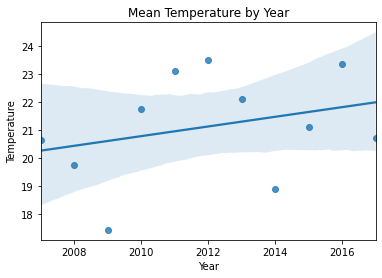

In [14]:
df_temp = df[['Temperature', 'Year']]
df_temp = df_temp.groupby('Year', as_index = False).mean()
sns.regplot(data = df_temp, x='Year', y='Temperature')
plt.title('Mean Temperature by Year')

### As we can see, the temperature trends higher over the course of the year. This is to be expected, as it matches the global trend. 

### Next, we'll take a look at the number of total observations made per year:

Text(0, 0.5, 'Number of Observations')

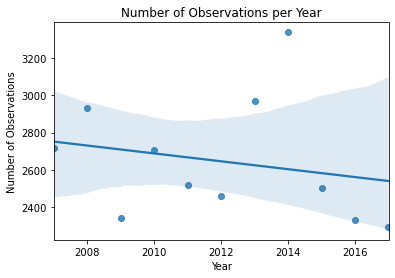

In [15]:
df_obs = df[['Year','Species']]
df_obs = df_obs.groupby('Year', as_index=False).count()
sns.regplot(data=df_obs, y='Species',x='Year')
plt.title('Number of Observations per Year')
plt.ylabel('Number of Observations')

### Here we can see that the number of observations is trending downwards. This points towards the hypothesis being correct, where warmer temperatures lead to decreased observations. The extremes of the plots even match up—the colder year in 2014 had far higher observations than warmer 2013 and 2015. 

### Overall, the data seems to show that the hotter it gets, the less likely it is to get good observations of birds. As such, moving forward, surveyors need to be aware of the bias that could be introduced based on climate. 

### Further research into this topic could include a larger dataset that covers more varying ecosystems. This data exists, but is not available to the public. A more robust dataset would allow for insight into the trends on a national or even global scale, drastically increasing the confidence in the results. 